In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pprint import pprint
import openweathermapy.core as owm
import seaborn as sns
import numpy as np
from pprint import pprint

In [2]:
SFB_csv = "Raw_Data/EPA_AQI_2017_SFBAY.csv"
SFB_data = pd.read_csv(SFB_csv)
print(SFB_data.columns)
print("------------------------------")
print(SFB_data.shape)
print("------------------------------")
print(SFB_data.dtypes)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
------------------------------
(2217, 10)
------------------------------
State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object


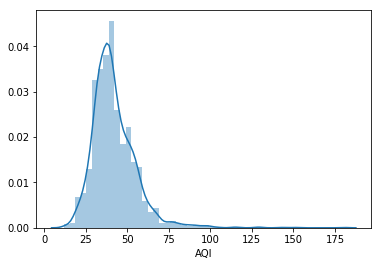

In [3]:
# plt.hist(SFB_data.AQI)
# sns.distplot(SFB_data.AQI, kde=False, rug=True)
# sns.kdeplot(SFB_data.AQI, shade=True);

sns.distplot(SFB_data.AQI) #Hist for all AQIs

AxesSubplot(0.125,0.125;0.775x0.755)


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,California,Alameda,6,1,1/1/2017,45,Good,PM2.5,06-001-0011,6
1,California,Alameda,6,1,1/2/2017,36,Good,Ozone,06-001-2005,6
2,California,Alameda,6,1,1/3/2017,35,Good,Ozone,06-001-2005,6
3,California,Alameda,6,1,1/4/2017,40,Good,NO2,06-001-0012,6
4,California,Alameda,6,1,1/5/2017,36,Good,PM2.5,06-001-0011,6


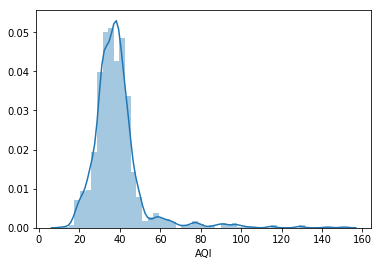

In [4]:
time_series_17 = SFB_data.Date
AQI = SFB_data.AQI
Category = SFB_data.Category
Ozone_param = SFB_data[SFB_data["Defining Parameter"] == 'Ozone']
Ozone_param_y = Ozone_param.AQI
Ozone_param_x = Ozone_param.Date
print(sns.distplot(Ozone_param_y))
# plt.bar(Ozone_param_x, Ozone_param_y) #AQI for Ozone measurement over 2017; need to bin dates into months
                        #and average values where the date is the same for a county's measurement.
SFB_data.head()

In [26]:
#Binning dates into months

SFB_data['Months']=SFB_data.Date.apply(lambda x: str(x)[:1]) #isolate the month
# SFB_data['Months']= SFB_data['Months'].replace({'1': "January",'2': "February",
#                                       '3': "March",'4': "April",
#                                       '5': "May",'6': "June",
#                                       '7': "July",'8': "August",
#                                        '9': "September"})
SFB_data['Months'].unique()
SFB_data['Months'].head
SFB_data.head()



# SFB_data['Months'].max() #Missing data for Oct-December!!
# for index, row in SFB_data.iterrows():
#     month, day, year = len(row['Date'].split("/"))
#     print("Month = %s, Day = %s, Year = %s") #https://stackoverflow.com/questions/37200142/mm-dd-yyyy-date-to-variable-conversion-m-d-and-y

# month, day, year = time_series_17.split('/')
# print("Month = %s, Day = %s, Year = %s") #https://stackoverflow.com/questions/36108377/how-to-use-the-split-function-on-every-row-in-a-dataframe-in-python

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Months
0,California,Alameda,6,1,1/1/2017,45,Good,PM2.5,06-001-0011,6,1
1,California,Alameda,6,1,1/2/2017,36,Good,Ozone,06-001-2005,6,1
2,California,Alameda,6,1,1/3/2017,35,Good,Ozone,06-001-2005,6,1
3,California,Alameda,6,1,1/4/2017,40,Good,NO2,06-001-0012,6,1
4,California,Alameda,6,1,1/5/2017,36,Good,PM2.5,06-001-0011,6,1


Months
1    43.541219
2    38.190476
3    37.577061
4    41.896296
5    40.000000
6    39.951852
7    42.845878
8    50.949821
9    47.166667
Name: AQI, dtype: float64


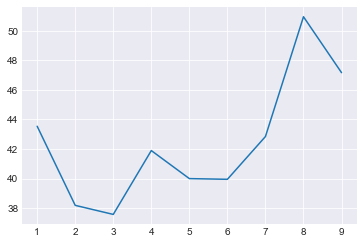

In [50]:
SFB_data_months_m = SFB_data.groupby("Months").mean() 
AQI_m_permonths = SFB_data_months_m.AQI
AQI_m_permonths #Trendline
SFB_data.Category.unique()
print(AQI_m_permonths)

#Avg. AQI per month during 2017
sns.set_style("darkgrid")
plt.plot(AQI_m_permonths)
plt.show()

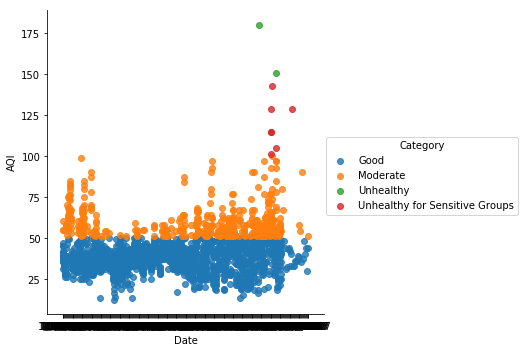

In [48]:
#AQI Distribution for each measurement date
sns.lmplot( x="Date", y="AQI", data=SFB_data, fit_reg=False, hue='Category', legend=True)

State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
Months                        int32
dtype: object


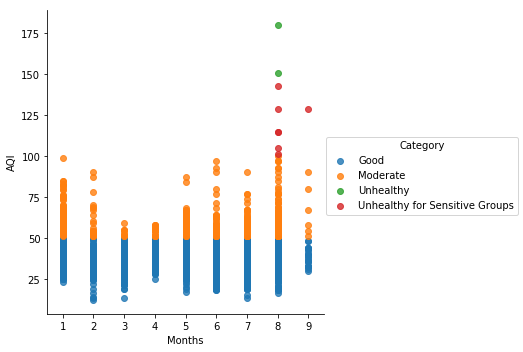

In [47]:
SFB_data.Months=SFB_data.Months.astype(int)
print(SFB_data.dtypes)

#AQI Distribution by months
sns.lmplot( x="Months", y="AQI", data=SFB_data, fit_reg=False, hue='Category', legend=True)
# plt.legend(loc='lower right')

# labels = ['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups']
# colors = {'Good':'#FFD700', 'Moderate':'#87CEFA', 'Unhealthy':'#F08080','Unhealthy':'#F08080'}

In [67]:
#Limit: 500 requests per hours
            #Select randomly up to 50 zip codes from the AirNow API
                #Select 7 days (a week) during October 2017 (height of the Sonoma fires)
                    #Oct. 9th - Oct. 15th.

Zip_csv = "Raw_Data/bayarea_zipcodes.csv"
Zip_data = pd.read_csv(Zip_csv)
Zip_data = Zip_data.ZIP
random_zip = []
random_zip = Zip_data.sample(70)
random_zip=random_zip.reset_index(drop=True)

date_range = []

query_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode={XXX}&date=2017-10-{XXX}T00-0000&distance=25&API_KEY=42C6925A-9E38-4682-8706-77E17F01F983"

counter = 0
for index, row in weather_df.iterrows():
    



0     94111
1     94618
2     94061
3     94702
4     94512
5     95140
6     94903
7     94549
8     95620
9     94609
10    94129
11    94611
12    94528
13    94566
14    94519
15    94577
16    94089
17    94027
18    94124
19    94602
20    94063
21    94555
22    94116
23    94546
24    95035
25    94705
26    94507
27    94019
28    94939
29    94112
      ...  
40    94525
41    94970
42    94506
43    95002
44    94535
45    94304
46    94954
47    94947
48    94127
49    94571
50    94949
51    94965
52    94108
53    94014
54    94596
55    94520
56    94121
57    94114
58    94708
59    94704
60    94946
61    94401
62    94080
63    94043
64    94587
65    94804
66    94403
67    94590
68    94585
69    94920
Name: ZIP, Length: 70, dtype: int64

In [12]:
# url1 ="https://aqs.epa.gov/api/rawData?user=hp.nunes@protonmail.com&pw=cobalthawk52&format=AQCSV&pc=AQI_POLLUTANTS&bdate=20170101&edate=20171231&state=06&county=001&county=013&county=041&county=055&county=075&county=081&county=085&county=095&county=097"
# request1 = requests.get(url1).json()
# print(request1)
# pprint(request_json)

#Variables of interest:
    #AQI except filter where AQI = -1
    #Category
    #Lat, Long
    #StateCode
    #ReportingArea
    #DateForecast & DateIssue
    #ParameterName
        #link to documentation: https://docs.airnowapi.org/forecastsbylatlon/docs

[{'AQI': 50,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-09 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 46,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-10 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': -1,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-11 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': -1,
  'ActionDay': False,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateForecast': '2018-04-12 ',
  'DateIssue': '2018-04-09 ',
  'Latitude': 37.75,
  'Longitude':

In [20]:
#Query by zip code

url_z = "http://www.airnowapi.org/aq/observation/zipCode/current/?format=application/json&zipCode=94133&distance=25&API_KEY=E2D50D6C-9124-4349-8C9A-96C411439052"
print(requests.get(url_z))

<Response [200]>


In [19]:
request_z = requests.get(url_z)
request_z_json=request_z.json()
pprint(request_z_json)

[{'AQI': 28,
  'Category': {'Name': 'Good', 'Number': 1},
  'DateObserved': '2018-04-09 ',
  'HourObserved': 13,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'O3',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'},
 {'AQI': 53,
  'Category': {'Name': 'Moderate', 'Number': 2},
  'DateObserved': '2018-04-09 ',
  'HourObserved': 13,
  'Latitude': 37.75,
  'LocalTimeZone': 'PST',
  'Longitude': -122.43,
  'ParameterName': 'PM2.5',
  'ReportingArea': 'San Francisco',
  'StateCode': 'CA'}]
